<a href="https://colab.research.google.com/github/AkhilE-47/Regression-models/blob/main/Linear_Model_in_Wal_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Walmart_customer_purchases.csv')

Saving Walmart_customer_purchases.csv to Walmart_customer_purchases (2).csv


In [9]:
df.head(5)

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [13]:
df.columns

Index(['Age', 'Purchase_Amount', 'Repeat_Customer'], dtype='object')

In [10]:
df.columns.value_counts()

,count
Customer_ID,1
Age,1
Gender,1
City,1
Category,1
Product_Name,1
Purchase_Date,1
Purchase_Amount,1
Payment_Method,1
Discount_Applied,1


In [11]:
# Drop unwanted features safely
df = df.drop(['Customer_ID', 'Gender', 'City', 'Category', 'Product_Name',
              'Purchase_Date', 'Payment_Method', 'Discount_Applied', 'Rating'],
             axis=1, errors='ignore')

In [12]:
df

,Age,Purchase_Amount,Repeat_Customer
0,49,253.26,Yes
1,36,73.19,No
2,52,125.62,No
3,47,450.32,Yes
4,43,369.28,Yes
...,...,...,...
49995,48,391.48,No
49996,51,272.09,No
49997,51,280.81,No
49998,33,140.74,No


In [14]:

# Encode categorical variables
le = LabelEncoder()
df['Repeat_Customer'] = le.fit_transform(df['Repeat_Customer'])
# If Location is categorical, uncomment below
# df['Location'] = le.fit_transform(df['Location'])


In [15]:
# Define features and target
X = df.drop(['Purchase_Amount'], axis=1)
y = df['Purchase_Amount']

In [16]:
X

,Age,Repeat_Customer
0,49,1
1,36,0
2,52,0
3,47,1
4,43,1
...,...,...
49995,48,0
49996,51,0
49997,51,0
49998,33,0


In [17]:
y

,Purchase_Amount
0,253.26
1,73.19
2,125.62
3,450.32
4,369.28
...,...
49995,391.48
49996,272.09
49997,280.81
49998,140.74


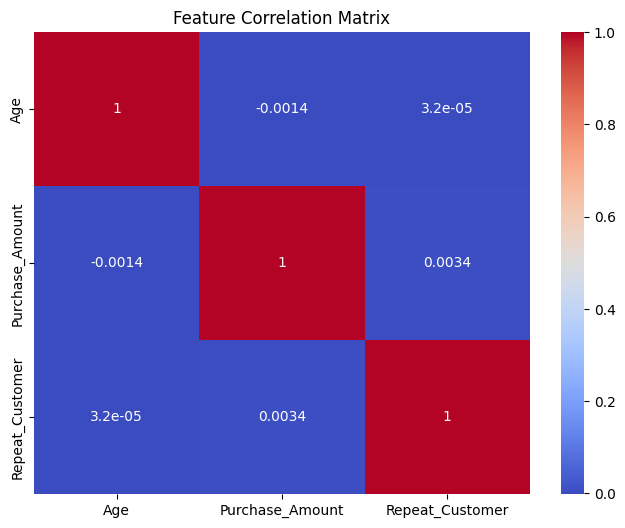

In [18]:
# Correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [19]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_scaled

array([[ 0.81099928,  0.99028717],
       [-0.2375558 , -1.0098081 ],
       [ 1.05297353, -1.0098081 ],
       ...,
       [ 0.97231544, -1.0098081 ],
       [-0.47953005, -1.0098081 ],
       [-1.68940129, -1.0098081 ]])

In [22]:
# Optional: Polynomial features (uncomment to use)
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_scaled = poly.fit_transform(X_scaled)

In [26]:
# Lasso Feature Selection
lasso = LassoCV(cv=8, random_state=42)
lasso.fit(X_scaled, y)

LassoCV(cv=8, random_state=42)

In [27]:
# Keep features with non-zero coefficients
selected_mask = lasso.coef_ != 0
selected_features = X.columns[selected_mask]
print("Selected Features via Lasso:", selected_features.tolist())



Selected Features via Lasso: ['Repeat_Customer']


In [28]:
selected_features.tolist()

['Repeat_Customer']

In [29]:
# Reduce X to selected features
X_selected = X[selected_features]
X_selected_scaled = scaler.fit_transform(X_selected)


In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.2, random_state=42)


In [31]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict
y_pred = lr.predict(X_test)

In [33]:
y_pred

array([256.02137152, 255.00217939, 256.02137152, ..., 256.02137152,
       256.02137152, 255.00217939])

In [34]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

Linear Regression RMSE: 141.10
Linear Regression R² Score: 0.00


In [35]:
# --- Visualizations ---

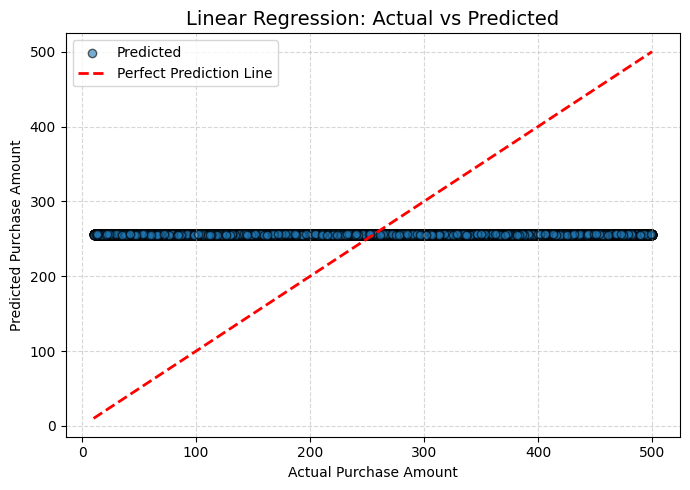

In [36]:
# 1. Actual vs. Predicted Plot with Annotation and Legend
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Perfect Prediction Line")
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Linear Regression: Actual vs Predicted", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # Add legend to label the lines
plt.tight_layout()
plt.show()

In [42]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print("Top features:", selected_features.tolist())


Top features: ['Age', 'Repeat_Customer']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=8 > n_features=2. There will be no feature selection and all features will be kept.
  warnings.warn(


In [43]:
selected_features.tolist()

['Age', 'Repeat_Customer']

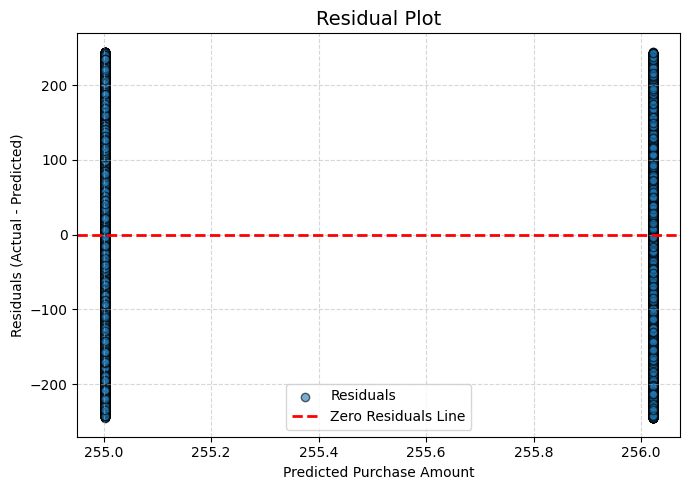

In [37]:
# 2. Residual Plot with Annotation for Zero Residuals Line and Legend
residuals = y_test - y_pred

plt.figure(figsize=(7, 5))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolor='k', label="Residuals")
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label="Zero Residuals Line")
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # Add legend to label the lines
plt.tight_layout()
plt.show()

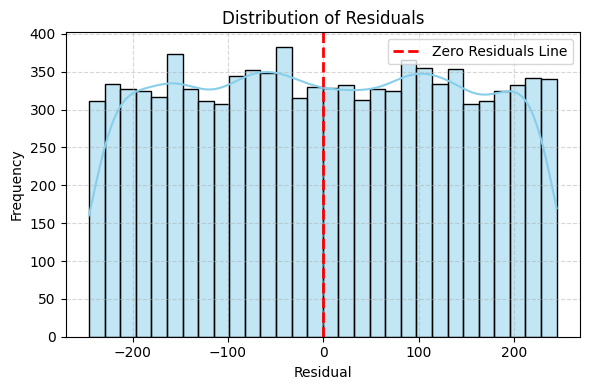

In [38]:
# 3. Residuals Distribution Plot with Vertical Line at Zero and Legend
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2, label="Zero Residuals Line")
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()